# Analysis of Manual Annotations - References to other Periodicals

This notebook investigates how periodicals referenced each other, effectively creating a network of periodicals. This network is created on the basis of manually annotations of works mentioned in the texts. It shows these references as directed edges. Relations that are not contained in the corpus (mainly information about translations provided by Alexandra Fuchs and Elisabeth Hobisch, University of Graz) are shown as red edges in the last cell.

This notebook (mainly provided by Bernhard Geiger, Know-Center) is supposed to work with the pickled data from August 11th, 2021.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.style.use("seaborn-whitegrid")
plt.rc('ps',fonttype = 42)
plt.rc('pdf',fonttype = 42)
plt.rcParams.update({'font.size': 20})
plt.rcParams['ps.useafm'] = True
#plt.rcParams['pdf.use14corefonts'] = True
plt.rcParams['axes.unicode_minus'] = False

import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [2]:
texts_df = pd.read_pickle("../data/processed/texts_new_20210811.p")

# Extract works

In [3]:
works_cnt = pd.Series()
for works in texts_df["works"]:
    for work in works:
        if work not in works_cnt:
            works_cnt[work] = 1
        else:
            works_cnt[work] += 1

print('Number of unique works: ' + str(len(works_cnt)))
print('Number of works occurring more than once: ' + str(len(works_cnt[works_cnt>1])))
print('Number of works occurring more than 5 times: ' + str(len(works_cnt[works_cnt>5])))

Number of unique works: 1133
Number of works occurring more than once: 255
Number of works occurring more than 5 times: 57


<ipython-input-3-f9359fb96794>:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  works_cnt = pd.Series()


In [4]:
texts_df.loc[texts_df.periodical_title=='La Spectatrice danoise, ou l\'Aspasie moderne','periodical_title']='La Spectatrice Danoise Ou L’aspasie Moderne'
texts_df.loc[texts_df.periodical_title=='Le Spectateur françois, ou Journal des Mœurs','periodical_title']='Le Spectateur François Ou Journal Des Moeurs'
texts_df.loc[texts_df.periodical_title=='Le Spectateur ou le Socrate moderne','periodical_title']='Le Spectateur, Ou Le Socrate Moderne'
texts_df.loc[texts_df.periodical_title=='Lo Spettatore italiano','periodical_title']='Spettatore italiano'
#texts_df.loc[texts_df.periodical_title=='El Corresponsal del Censor','periodical_title']='El Corresponsal Del Censor'
texts_df.loc[texts_df.periodical_title=='Lo Spettatore italiano-piemontese','periodical_title']='Spettatore italiano-piemontese'
for journal_name in sorted(set(texts_df.periodical_title.unique())):
    print(journal_name)
    
print('\nNumber of Journals: '+str(len(texts_df.periodical_title.unique())))

Der Bürger
Der Leipziger Spectateur
Der Zuschauer
Die Zuschauerin
El Amigo y Corresponsal del Pensador
El Apologista Universal
El Argonauta español
El Belianís literario
El Catón Compostelano
El Censor
El Corresponsal del Apologista
El Corresponsal del Censor
El Curioso Entretenido
El Duende Crítico
El Duende de Madrid
El Duende especulativo sobre la vida civil
El Escritor sin título
El Filósofo á la Moda
El Juzgado Casero
El Murmurador imparcial
El Observador
El Pensador
El Pensador Mexicano
El Regañón general
El Teniente del Apologista
Gazzetta urbana veneta
Gazzetta veneta
Gli Osservatori veneti
Il Caffè
Il Filosofo alla Moda
Il Socrate veneto
L'Indigent philosophe ou l'homme sans souci
La Bagatelle
La Bigarure
La Frusta Letteraria di Aristarco Scannabue
La Pensadora Gaditana
La Pensatriz salmantina
La Spectatrice
La Spectatrice Danoise Ou L’aspasie Moderne
La Spectatrice. Ouvrage traduit de l'anglois
La Spettatrice
La donna galante ed erudita
Le Cabinet du Philosophe
Le Censeur ou 

In [5]:
import csv
with open('unique_work_ids.csv', mode='r') as infile:
    reader = csv.reader(infile,delimiter=',')
    mydict = {rows[1].lower():rows[0] for rows in reader}
with open('unique_work_ids.csv', mode='r') as infile:
    reader = csv.reader(infile,delimiter=',')
    re_dict= {rows[0]:rows[1] for rows in reader}

In [6]:
texts_df['translated_title']=texts_df.periodical_title.str.lower().replace(mydict)
sorted(texts_df.translated_title.unique())

['der bürger',
 'der leipziger spectateur',
 'der zuschauer',
 'die zuschauerin',
 'el amigo y corresponsal del pensador',
 'el argonauta español',
 'el belianís literario',
 'el corresponsal del apologista',
 'el duende crítico',
 'el duende de madrid',
 'el duende especulativo sobre la vida civil',
 'el escritor sin título',
 'el murmurador imparcial',
 'el observador',
 'el pensador mexicano',
 'el teniente del apologista',
 'gazzetta urbana veneta',
 'gli osservatori veneti',
 'il caffè',
 'il filosofo alla moda',
 'il socrate veneto',
 "l'indigent philosophe ou l'homme sans souci",
 'la bigarure',
 'la donna galante ed erudita',
 'la frusta letteraria di aristarco scannabue',
 'la pensatriz salmantina',
 "la spectatrice. ouvrage traduit de l'anglois",
 'la spettatrice',
 'le cabinet du philosophe',
 'le monde',
 'le nouveau spectateur français',
 'le philosophe nouvelliste',
 'le spectateur français avant la révolution',
 'le spectateur françois pendant le gouvernement révolutionn

In [7]:
reduced_df=texts_df.loc[texts_df.translated_title.str.startswith('work:'),:]
reduced_df=reduced_df[['works','translated_title']]
reduced_df.head()

,works,translated_title
0,{},work:W.0619
1,{},work:W.0619
2,{},work:W.0619
3,"{work:W.0309, work:W.0330}",work:W.0619
4,{},work:W.0619


In [8]:
# If other periodicals should be considered in the graph that are not contained in the corpus, they can be added here

periodical_list=reduced_df.translated_title.unique()
periodical_list=np.append(periodical_list,'work:W.1047') # The Spectator
periodical_list=np.append(periodical_list,'work:W.1028') # The Guardian
periodical_list=np.append(periodical_list,'work:W.1050') # The Tatler
periodical_list

array(['work:W.0619', 'work:W.0634', 'work:W.0986', 'work:W.0987',
       'work:W.0374', 'work:W.0260', 'work:W.0587', 'work:W.0594',
       'work:W.0597', 'work:W.0288', 'work:W.0488', 'work:W.0534',
       'work:W.0595', 'work:W.0554', 'work:W.0615', 'work:W.0286',
       'work:W.0268', 'work:W.0552', 'work:W.0266', 'work:W.0617',
       'work:W.0259', 'work:W.0616', 'work:W.0255', 'work:W.0271',
       'work:W.0564', 'work:W.0277', 'work:W.1047', 'work:W.1028',
       'work:W.1050'], dtype=object)

In [9]:
reduced_df[periodical_list]=0

for row in range(len(reduced_df)):
    for work in reduced_df['works'].iloc[row]:
        if work in periodical_list:
            reduced_df[work].iloc[row]+=1
                
reduced_df.head()

/home/bgeiger/anaconda3/envs/py38/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,works,translated_title,work:W.0619,work:W.0634,work:W.0986,work:W.0987,work:W.0374,work:W.0260,work:W.0587,work:W.0594,...,work:W.0617,work:W.0259,work:W.0616,work:W.0255,work:W.0271,work:W.0564,work:W.0277,work:W.1047,work:W.1028,work:W.1050
0,{},work:W.0619,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,{},work:W.0619,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,{},work:W.0619,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"{work:W.0309, work:W.0330}",work:W.0619,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,{},work:W.0619,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
reduced_df=reduced_df.groupby('translated_title').sum()
reduced_df.rename(index=re_dict,columns=re_dict,inplace=True)
reduced_df.head()

,"Le Spectateur, Ou Le Socrate Moderne",Les Chiffons,Spettatore Italiano,Spettatore Italiano-piemontese,Gazzetta Veneta,El Censor,Le Mentor Moderne,Le Misantrope,Le Nouveau Spectateur,El Regañón General,...,Le Spectateur François Ou Le Nouveau Socrate Moderne,El Catón Compostelano,Le Spectateur François Ou Journal Des Moeurs,El Apologista Universal,El Filósofo Á La Moda,Le Censeur Ou Caractères Des Mœurs De La Haye,El Juzgado Casero,The Spectator,The Guardian,The Tatler
translated_title,,,,,,,,,,,,,,,,,,,,,
El Apologista Universal,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
El Catón Compostelano,0,0,0,0,0,0,0,0,0,0,...,0,14,0,0,0,0,0,0,0,0
El Censor,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
El Corresponsal Del Censor,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
El Curioso Entretenido,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
import networkx as nx
import numpy as np

In [12]:
for work in set(list(reduced_df.columns)+list(reduced_df.index)):
    if work not in reduced_df.columns:
        reduced_df[work]=0
    if work not in reduced_df.index:
        reduced_df.loc[work]=0

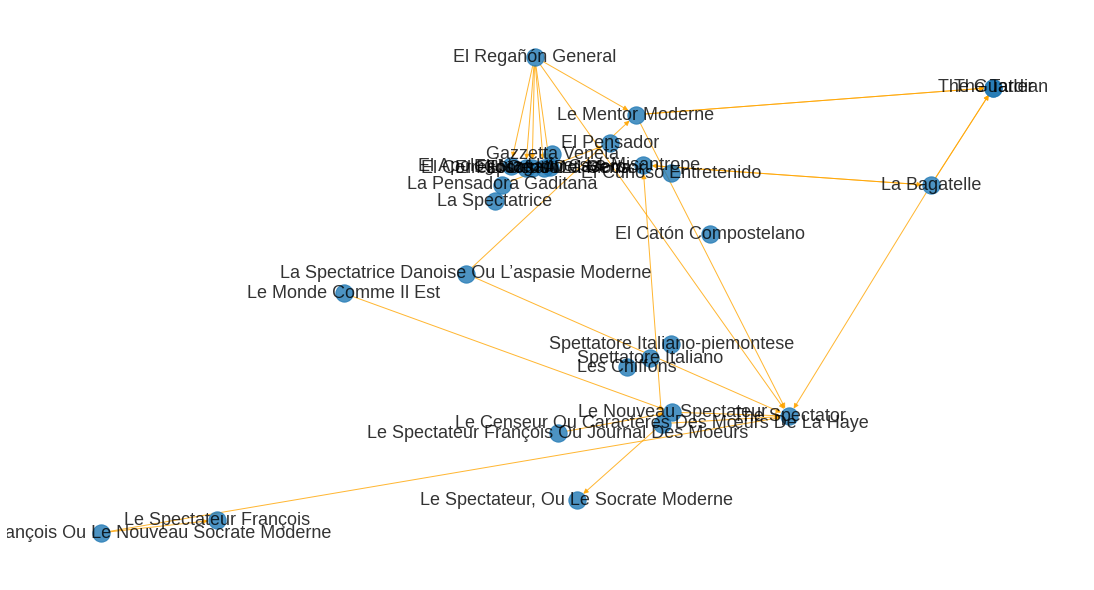

In [13]:
G = nx.from_pandas_adjacency(reduced_df,create_using=nx.DiGraph())
G.remove_edges_from(nx.selfloop_edges(G))
plt.figure(figsize=(15,8))
nx.draw_kamada_kawai(G,with_labels=True,font_size=18,font_color='k',edge_color='orange',alpha=0.8)
plt.show()

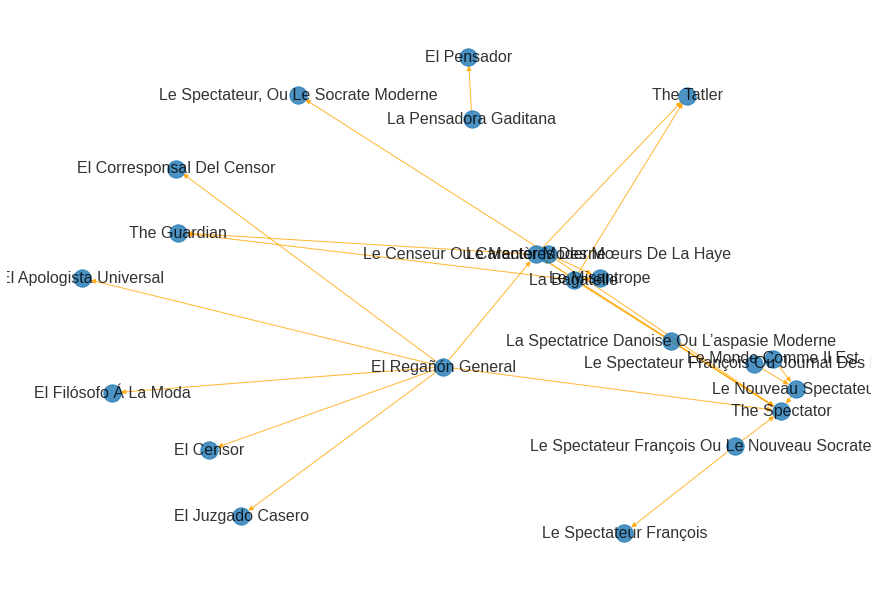

In [14]:
A=G
A.remove_nodes_from(list(nx.isolates(G)))
plt.figure(figsize=(12,8))
nx.draw_spring(A,with_labels=True,font_size=16,font_color='k',edge_color='orange',alpha=0.8)
plt.show()

In [19]:
B=nx.MultiDiGraph()
B.add_nodes_from(A);
B.add_edges_from(A.edges,color='orange',weight=3);

B.add_edge('The Spectator','Le Spectateur françois ou le Nouveau Socrate moderne',color='red', weight=3)
B.add_edge('The Spectator','Der Zuschauer',color='red', weight=3)
B.add_edge('Le Spectateur françois ou le Nouveau Socrate moderne','Il Filosofo alla Moda',color='red', weight=3)
B.add_edge('Il Filosofo alla Moda','El Filósofo á la Moda',color='red', weight=3)

B.add_edge('The Female Spectator','Die Zuschauerin',color='red', weight=3)
B.add_edge('The Female Spectator','La Spectatrice. Ouvrage traduit de l\'anglois',color='red', weight=3)
B.add_edge('The Female Spectator','La Spettatrice',color='red', weight=3)

B.add_edge('The Tatler','Le Philosophe nouvelliste',color='red', weight=3)

B.add_edge('The Guardian','Le Mentor moderne',color='red', weight=3)

0

In [20]:
works_to_language=texts_df[['periodical_title','language']].drop_duplicates()
works_to_language=works_to_language.append({'periodical_title':'The Tatler','language':'English'},ignore_index=True)
works_to_language=works_to_language.append({'periodical_title':'The Guardian','language':'English'},ignore_index=True)
works_to_language=works_to_language.append({'periodical_title':'The Spectator','language':'English'},ignore_index=True)
works_to_language=works_to_language.append({'periodical_title':'La Gazeta Española','language':'Spanish; Castilian'},ignore_index=True)
works_to_language=works_to_language.append({'periodical_title':'Le Spectateur François ou Journal des moeurs','language':'French'},ignore_index=True)
works_to_language=works_to_language.append({'periodical_title':'Le Spectateur François ou le Nouveau Socrate Moderne.','language':'French'},ignore_index=True)

language_to_color={'French':'red','English':'blue','Italian':'green','Spanish; Castilian':'brown','German':'cyan'}


works_to_language=works_to_language.replace({'language':language_to_color})

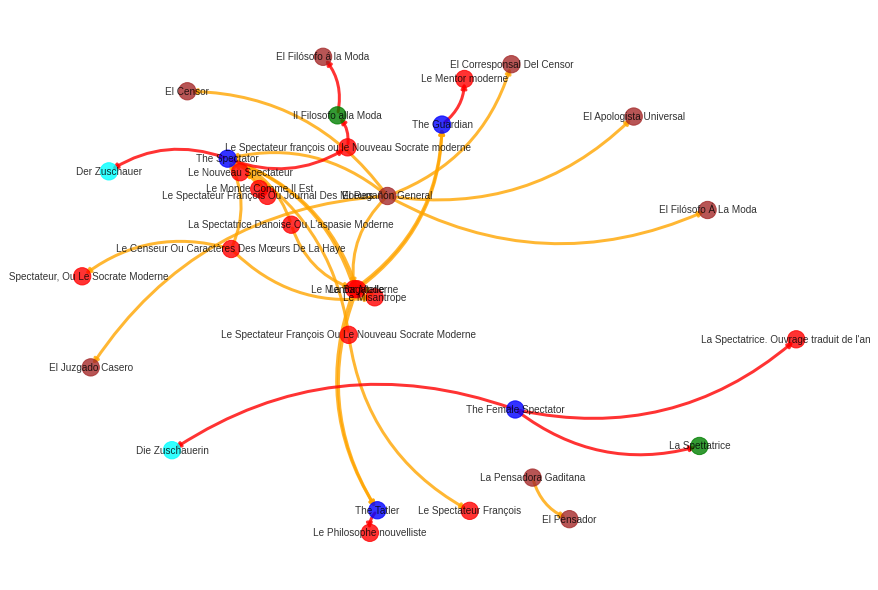

In [22]:
edges = B.edges()

colors = []
weights = []

for (u,v,attrib_dict) in list(B.edges.data()):
    colors.append(attrib_dict['color'])
    weights.append(attrib_dict['weight'])

node_color=[]
for n in list(B.nodes):
    node_color.append(works_to_language.loc[works_to_language['periodical_title'].str.lower()==n.lower()]['language'].values[0])
    B.nodes[n]['color']=works_to_language.loc[works_to_language['periodical_title'].str.lower()==n.lower()]['language'].values[0]

#nx.set_node_attributes(B, node_color, 'color')

plt.figure(figsize=(12,8))
pos=nx.spring_layout(B)
nx.draw(B,pos=pos,with_labels=True,font_size=10,font_color='k',alpha=0.8,edgelist=[],node_color=node_color)
nx.draw_networkx_edges(B, pos,node_size=50,edge_color=colors,width=weights,alpha=0.8,connectionstyle='arc3,rad=.25')
plt.show()